In [36]:
from __future__ import print_function
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import sklearn.datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np

In [37]:
def loaddocuments():
    rootdir = 'D:\\Data\\lsi\\bbc'
    documents = []
    r = ''
    
    df = pd.read_excel('./path_module2.xlsx')
    df = df[(df['MODULENAME'] == 'BR_AAA') | (df['MODULENAME'] == 'NP_HAL')] # | (df['MODULENAME'] == 'RT_NSE') | \
    #    (df['MODULENAME'] =='RTADAPT_FWD_FRAME') | (df['MODULENAME'] =='NP_HAL') | (df['MODULENAME'] =='RT_NSE')]
    j  = 0
    target = np.zeros((df.count()['MODULENAME'],), dtype=np.int64)
    categories = df['MODULENAME'].unique().tolist()
    documents = []
    for index, row in df.iterrows():
        #data = ' '.join(row['FILENAME'].split('.')[0].split('_'))
        arr = row['FILEPATH'].split('.')[0].replace('\\', '_').split('_')
        arr = list(filter(lambda x: len(x)>0, arr))
        data = ' '.join(arr)

        documents.append(data)
        target[j] = categories.index(row['MODULENAME'])
        j = j + 1

    return sklearn.datasets.base.Bunch(data=documents, target=target, target_names=categories), categories

In [38]:
dataset, categories = loaddocuments()
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

613 documents
2 categories



In [39]:
vectorizer = HashingVectorizer(n_features=1000,
                                       norm=None,
                                       binary=False)

In [40]:
X = vectorizer.fit_transform(dataset.data)

In [41]:
print("n_samples: %d, n_features: %d" % X.shape)

n_samples: 613, n_features: 1000


In [42]:
svd = TruncatedSVD(15)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

Explained variance of the SVD step: 78%


In [46]:
km = KMeans(n_clusters=len(dataset.target_names), init='k-means++', max_iter=100, n_init=1)

In [47]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand-Index: 1.000
Silhouette Coefficient: 0.506



In [49]:
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 1

centroids = km.cluster_centers_
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids1 = model.fit_transform(centroids)
#print(centroids)
#plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
#plt.show()
if type(X) != np.ndarray:
    X = np.asarray(X.toarray())

X = np.append(X, km.cluster_centers_, axis=0)
labels = np.append(labels, range(true_k))
transformed_centroids = model.fit_transform(X)
#else:
#    print('666666666666666666')
#    transformed_centroids = model.fit_transform(X.toarray())

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]



In [50]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    print('4444', len(labels))

4444 615
4444 615


In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot([[0,0],[1,1]], linewidth=4,label='fff')
#plt.show()
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    print('4444', len(labels))

    

4444 615
4444 615


4444 615


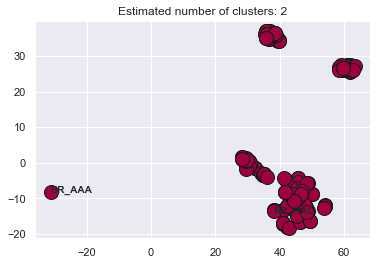

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot([[0,0],[1,1]], linewidth=4,label='fff')
#plt.show()
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    print('4444', len(labels))
    class_member_mask = (labels == k)

    #if type(X) != np.ndarray:
    #    X = X.toarray()
    xy = transformed_centroids[class_member_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    #xy = transformed_centroids[class_member_mask]
    #plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
    #         markeredgecolor='k', markersize=6)
    break

for i, txt in enumerate(X[-len(km.cluster_centers_):]):
    plt.annotate(categories[i], (transformed_centroids[len(X) - len(km.cluster_centers_) + i][0], transformed_centroids[len(X) - len(km.cluster_centers_) + i][1]), weight='bold')
    
plt.title('Estimated number of clusters: %d' % true_k)
plt.show()